In [1]:
import requests
import tweepy
import pandas as pd
from bs4 import BeautifulSoup
import json
from timeit import default_timer as timer
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Gather

### Define image_predictions gather
>Firstly I am going to set the parameters needed to retrieve and read the image_predictions data.

#### Code

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
responce = requests.get(url)
master_data = BeautifulSoup(responce.content, 'lxml')

In [3]:
with open(url.split('/')[-1].replace('-', '_'), 'wb') as file: 
    file.write(responce.content)
image_predictions = pd.read_csv(url.split('/')[-1].replace('-', '_'), sep='\t')

#### Test

In [4]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define Read Twitter Archive
>Now I am going to read the twitter archive csv file.

#### Code

In [5]:
df = pd.read_csv('twitter-archive-enhanced.csv')

#### Test

In [6]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define API Gather
>Here I am going to gather all the data from the twitter API.

#### Code

In [7]:
consumer_key = 'E0csqTUp637iiaoVx8tLsQ5yz'
consumer_secret = 'Ej72o7nRpHzZMiDDHdnjtGtY7zS26UrMAbEtjwoUmMJ0fHqVhq'
access_token = '225908476-tfPBgRWH31PI3PKczhJGGRXCJr7YHRIx7pgEkaXT'
access_secret = 'ZE6woRXRfDFtfJXJybfAIpHy0OVCA7b4fHXvg9YASQANy'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
tweet_ids = df.tweet_id.values

In [9]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e

end = timer()

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
10

Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
13

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
18

Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
20

Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
23

>Here I am reading the json file from the API:

In [10]:
API_df = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        API_df = API_df.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                       columns=['tweet_id', 'retweet_count',
                                                'favorite_count']))
API_df = API_df.reset_index(drop=True)

#### Check

>Using the timeit import I will check the time it took to retrive the data from the API:

In [11]:
(end - start)/60

34.48511629833333

>And how many failed:

In [12]:
len(fails_dict)

25

>25 out of 2356 is ok.

>Now to test the API_df:

In [13]:
API_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7481,35420
1,892177421306343426,5549,30640
2,891815181378084864,3674,23050
3,891689557279858688,7656,38715
4,891327558926688256,8258,36978


# Access 

### Define duplicates test

In [14]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [15]:
df[df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [16]:
API_df[API_df.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


>No duplicates present in any of the three dataframes.

### Define Access
>Now I will view each dataframe and pass the describe() and info() functions.

In [17]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
API_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7481,35420
1,892177421306343426,5549,30640
2,891815181378084864,3674,23050
3,891689557279858688,7656,38715
4,891327558926688256,8258,36978
5,891087950875897856,2764,18637
6,890971913173991426,1794,10834
7,890729181411237888,16743,59694
8,890609185150312448,3818,25656
9,890240255349198849,6500,29290


In [24]:
API_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null object
favorite_count    2331 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


In [25]:
API_df.describe()

,tweet_id,retweet_count,favorite_count
count,2331,2331,2331
unique,2331,1681,1973
top,772117678702071809,112,0
freq,1,5,163


## Wrangle Report

### Gather

To gather the image predictions from the url provided I first used the requisitions library to save an access point to the url in a variable (response) and then used BeautifulSoup to parse the url, making sure to pass ‘lxml’ as an argument to avoid an error being thrown. After saving the Beautiful Soup result in a variable (master_data) I then use the following code to read the image predictions into a dataframe:

with open(url.split('/')[-1].replace('-', '_'), 'wb') as file: 
    file.write(responce.content)

image_predictions = pd.read_csv(url.split('/')[-1].replace('-', '_'), sep='\t')

And check that this has functioned as expected by printing the head of the new dataframe image_predictions. Next I read the twitter-archive-enhanced.csv into a variable df and check this has functioned as expected using the head function. Following this I have saved all the necessary information concerning access to my Twitter API and then opened an outfile as a json file and using a for loop accessed the Twitter API and fetched all the data corresponding to retweet and favourite statistics. Following this I have read the json file into a dataframe (API_df) and checked using a fails dictionary, created during the same function where I was reading the API, to check how many entries were not able to be fetched (877).

### Access

At the start of the access process print the three dataframes I have so far created to gather a broader picture as to what I am handling. I also use describe() and info() as well as duplicated() to understand the spread of data as well as dtypes and number of duplicates if any (luckily in this case none).

Through this process the following is what I observed:

##### Quality

All tweet_id's are integers rather than strings

`image_predictions`

- Tweet ID is an int

 `df`
- img_num is a irrelavant column in image_predictions
- p1-3_dog are irrelavent columns in image_predictions
- timestamp is a string
- retweeted_status_id is a float
- retweeted_status_timestamp is an object
- All retweets and replies should be deleted according to the prject ruburic.

##### Tidiness

`image_predictions`
- floofer, pupper, puppo columns marked as either none or the name of the column
- ['p2', 'p2_conf', 'p3', 'p3_conf'] are all irrelavant in terms that we are only going to need to look at the predictors best guess
- ['p1_dog', 'p2_dog', 'p3_dog'] are all irrelavant columns with only one value present (thgat being 'True', this column will be not be useful in our analysis do best to delete. 

`df`
- denominator and numerator in seperate columns
- value inputs under ['doggo', 'floofer', 'pupper', 'puppo'] could all be in one column as in vast majority of cases when a value is entered in at least one of these columns it is not mentioned in any other ones. We can therefore combine these columns. 

First thing I have done is to make a copy of each of the imnage_predictions and API_df dataframes. Next I have rectified both the instances of incorrect dtypes (timestamp and tweet_id) in the df and API_df dataframes respectively. I have then checked to make sure this has worked using the .info() function. Next I madesure the tweet id’s from df matched up with the tweet id’s in image_predictions. I have then done the same with the tweet id’s obtained by the API and happily all match up. After these respective processes I have merged the dataframes together and used the .head() function to check all the columns have been added to df. I have then dropped ['p2', 'p2_conf', 'p3', 'p3_conf'] as I do not think the second or third choices of the neural network arerelavant to our dataset (I come back to this in the Act Report). I do the same with ['p1_dog', 'p2_dog', 'p3_dog'] and again come back to it in the Act report. Next I replace NanN values with the ocrect np.nan function so that tehse instances are easier to deal with within pandas. I also extract the the dog_type values and parse them into one column and also creating arating column with the numerator and denominator columns. Next I drop all comuns which are retweets or replies and remove the necessary columns, checking that this has worked with the .head() function. Luckily in my data there are no instances when the extracted dog_types double up on eachotehr as shown by my use of value_counts() within in[55]. 

# Clean

In [26]:
image_predictions_clean = image_predictions.copy()
API_df_clean = API_df.copy()
df_clean = df.copy()

In [27]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
API_df_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7481,35420
1,892177421306343426,5549,30640
2,891815181378084864,3674,23050
3,891689557279858688,7656,38715
4,891327558926688256,8258,36978


In [29]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define Dtypes
>Here I will change datetime and tweet id into their respectively correct dtypes.

#### Code

In [30]:
df_clean.timestamp = pd.to_datetime(df.timestamp)

In [31]:
API_df_clean.tweet_id = API_df_clean.tweet_id.astype(str)
df_clean.tweet_id = df_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

In [32]:
API_df_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7481,35420
1,892177421306343426,5549,30640
2,891815181378084864,3674,23050
3,891689557279858688,7656,38715
4,891327558926688256,8258,36978


In [33]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [34]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [35]:
API_df_clean.tweet_id = API_df_clean.tweet_id.str.strip()
df_clean.tweet_id = df_clean.tweet_id.str.strip()
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.str.strip()

#### Test

In [36]:
API_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null object
favorite_count    2331 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [38]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define matching dataframes
>Here I will check whether my dataframes match on the tweet_id's column so that I can then merge them.

#### Check

In [39]:
# array of tweet ids for df_clean  
df_clean_tweet_ids = df_clean.tweet_id.values  
# list of tweet ids in df_clean  
# that are also in image_predictions_clean  
[x for x in image_predictions_clean.tweet_id.values if x in df_clean_tweet_ids]

['666020888022790149',
 '666029285002620928',
 '666033412701032449',
 '666044226329800704',
 '666049248165822465',
 '666050758794694657',
 '666051853826850816',
 '666055525042405380',
 '666057090499244032',
 '666058600524156928',
 '666063827256086533',
 '666071193221509120',
 '666073100786774016',
 '666082916733198337',
 '666094000022159362',
 '666099513787052032',
 '666102155909144576',
 '666104133288665088',
 '666268910803644416',
 '666273097616637952',
 '666287406224695296',
 '666293911632134144',
 '666337882303524864',
 '666345417576210432',
 '666353288456101888',
 '666362758909284353',
 '666373753744588802',
 '666396247373291520',
 '666407126856765440',
 '666411507551481857',
 '666418789513326592',
 '666421158376562688',
 '666428276349472768',
 '666430724426358785',
 '666435652385423360',
 '666437273139982337',
 '666447344410484738',
 '666454714377183233',
 '666644823164719104',
 '666649482315059201',
 '666691418707132416',
 '666701168228331520',
 '666739327293083650',
 '666776908

In [40]:
# array of tweet ids for df_clean  
df_clean_tweet_ids = df_clean.tweet_id.values  
# list of tweet ids in df_clean  
# that are also in image_predictions_clean  
[x for x in API_df_clean.tweet_id.values if x in df_clean_tweet_ids]

['892420643555336193',
 '892177421306343426',
 '891815181378084864',
 '891689557279858688',
 '891327558926688256',
 '891087950875897856',
 '890971913173991426',
 '890729181411237888',
 '890609185150312448',
 '890240255349198849',
 '890006608113172480',
 '889880896479866881',
 '889665388333682689',
 '889638837579907072',
 '889531135344209921',
 '889278841981685760',
 '888917238123831296',
 '888804989199671297',
 '888554962724278272',
 '888078434458587136',
 '887705289381826560',
 '887517139158093824',
 '887473957103951883',
 '887343217045368832',
 '887101392804085760',
 '886983233522544640',
 '886736880519319552',
 '886680336477933568',
 '886366144734445568',
 '886267009285017600',
 '886258384151887873',
 '886054160059072513',
 '885984800019947520',
 '885528943205470208',
 '885518971528720385',
 '885311592912609280',
 '885167619883638784',
 '884925521741709313',
 '884876753390489601',
 '884562892145688576',
 '884441805382717440',
 '884247878851493888',
 '884162670584377345',
 '883838122

#### Code

In [41]:
df_clean = pd.merge(df_clean, image_predictions_clean,
                            on='tweet_id', how='left')

In [42]:
df_clean = pd.merge(df_clean, API_df,
              on='tweet_id', how='left')

#### Test

In [43]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7481,35420
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5549,30640
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3674,23050
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7656,38715
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8258,36978


### Define drop
>The second and third choices from the image predicter will not be neccesary in my analysis so I will droip them here.

#### Code

In [44]:
df_clean.drop(['p2', 'p2_conf', 'p3', 'p3_conf'], axis=1, inplace=True)

In [45]:
df_clean.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis=1, inplace=True)

#### Test

In [46]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,7481,35420
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,5549,30640
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,3674,23050
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,7656,38715
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,8258,36978


## Quality

### Define NaN replacement and convergence of dog type columns
>Here I will replace all NaN values with the suitable empty value of '' so that functions I will use in my analysis are not confused by postive values such as 'None'. I will then extract the postive strings from the dog type columns and converge these values into one column (dog stages).

#### Code

In [47]:
def replace_nans(column):
    df_clean[column].replace('None', '', inplace=True)
    df_clean[column].replace(np.NaN, '', inplace=True)

replace = ['doggo', 'floofer', 'pupper', 'puppo']

for column in replace:
    replace_nans(column)

In [48]:
df_clean['dog_stages'] = df_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [49]:
df_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

#### Test

In [50]:
df_clean.dog_stages.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stages, dtype: int64

>Here we are cheking whether the columns doubled up and according to the above function they do not.

### Define rating columns
>Here I am creating a rating column using the numerator and denominator columns

#### Code

In [51]:
df_clean['rating'] = (df_clean.rating_numerator/ 
                                 df_clean.rating_denominator)

#### Test

In [52]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,jpg_url,img_num,p1,p1_conf,retweet_count,favorite_count,dog_stages,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,7481,35420,NaN,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,5549,30640,NaN,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,3674,23050,NaN,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,7656,38715,NaN,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,8258,36978,NaN,1.2


### Define Retweets and Replies
>Here I am going to remove all rows that are retweets or replies

#### Code

In [53]:
df_clean.drop(df[df_clean.in_reply_to_status_id.notnull()].index, inplace=True)

In [54]:
df_clean.drop(df_clean[df_clean.in_reply_to_user_id.notnull()].index, inplace=True)

#### Test

In [55]:
df_clean.in_reply_to_status_id.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: in_reply_to_status_id, dtype: float64

In [56]:
df_clean.in_reply_to_user_id.notnull().sum()

0

> After removing all rows that correspond to a reply I will now drop the columns associated to replies and following that will carry out the same process with retweets.  

#### Code

In [57]:
df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace = True)

#### Test

In [58]:
df_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,retweet_count,favorite_count,dog_stages,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,7481,35420,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,5549,30640,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,3674,23050,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,7656,38715,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,8258,36978,NaN,1.2


In [59]:
df_clean.drop(df[df.retweeted_status_id.notnull()].index, inplace=True)

In [60]:
df_clean.retweeted_status_timestamp.describe()

count     0
unique    0
Name: retweeted_status_timestamp, dtype: int64

### Define drop
>Here I am going to drop all columns that are no irrelavent after removing replies and retweets.

#### Code

In [61]:
df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace = True)

#### Check

In [62]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,retweet_count,favorite_count,dog_stages,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,7481,35420,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,5549,30640,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,3674,23050,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,7656,38715,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,8258,36978,NaN,1.2
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,2764,18637,NaN,1.3
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,1794,10834,NaN,1.3
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,16743,59694,NaN,1.3
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574,3818,25656,NaN,1.3
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,6500,29290,doggo,1.4


>With one more look at the df I am happy with the cleaning process. And I will now save the dataframe as twitter_archive_master.csv

In [63]:
df_clean.to_csv('twitter_archive_master.csv')

# Analyse

In [64]:
df_clean.retweet_count.mean()

2454.0124401913877

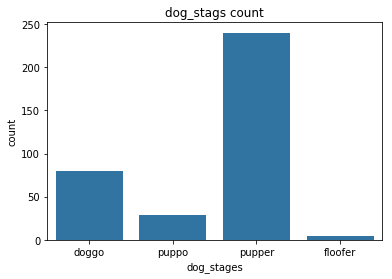

In [72]:
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'dog_stages', color = base_color).set_title("dog_stags count");

In [66]:
df_clean.name.value_counts()

None        603
a            55
Charlie      11
Lucy         11
Oliver       10
Cooper       10
Tucker        9
Penny         9
Sadie         8
the           8
Winston       8
Lola          8
Toby          7
Daisy         7
Jax           6
Bo            6
Stanley       6
Koda          6
Bella         6
Bailey        6
Oscar         6
an            6
Buddy         5
Milo          5
Louis         5
Leo           5
Dave          5
Scout         5
Chester       5
Bentley       5
           ... 
Pablo         1
Miley         1
Bobb          1
all           1
Arlo          1
Olaf          1
Laika         1
Cedrick       1
Shawwn        1
Kara          1
Dylan         1
Moofasa       1
Bert          1
Cilantro      1
Daniel        1
Crumpet       1
Amélie        1
Harvey        1
Butters       1
Hurley        1
Rose          1
Venti         1
Maya          1
Rueben        1
Kendall       1
Kanu          1
Fillup        1
Oddie         1
Poppy         1
Bloop         1
Name: name, Length: 955,

>Here we can see the most commonly occuring names in the dataset. Clearly more often than not the tweets do not mention the name of the dog or also very often the system used to parse the tweet and find the name fails and returns values such as 'a' or 'an' both of which we an see in the list abovew. These would be further points to clean if I was to continue this project.

In [67]:
df_clean.p1.value_counts()

golden_retriever             137
Labrador_retriever            94
Pembroke                      88
Chihuahua                     78
pug                           54
chow                          41
Samoyed                       40
Pomeranian                    38
toy_poodle                    37
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            21
seat_belt                     21
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     19
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
Shih-Tzu                      17
beagle                        17
teddy                         17
Cardigan                      17
Italian_greyhound             16
Rottweiler                    16
kuvasz                        15
Lakeland_terrier              15
Great_Pyrenees                14
          

>This list returns all the most common breeds found by the neural netwrok. At the top we can see golden_retriever with 137 appearances.

In [68]:
df_clean.favorite_count.value_counts()

405      4
409      4
1256     3
1468     3
585      3
1254     3
2364     3
179      3
1116     3
1712     3
2381     3
715      2
238      2
20914    2
2369     2
2673     2
9041     2
4596     2
5291     2
847      2
2665     2
2663     2
2099     2
3019     2
3739     2
3002     2
230      2
2083     2
3400     2
888      2
        ..
26575    1
2590     1
84691    1
10778    1
2560     1
40927    1
6631     1
2537     1
10730    1
2540     1
2546     1
14839    1
2553     1
2554     1
10749    1
6654     1
2562     1
3050     1
2565     1
14855    1
2569     1
23050    1
23051    1
2572     1
2576     1
2577     1
6674     1
3516     1
2582     1
1666     1
Name: favorite_count, Length: 1915, dtype: int64

>Here can see the value counts of the favorite column. 30696 favorites was the most that any tweet obtained in our dataset. 

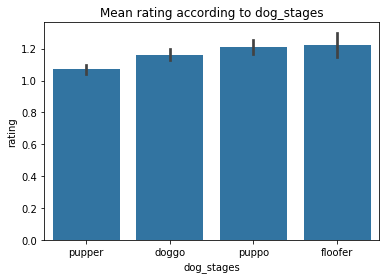

In [71]:
sb.barplot(data=df_clean, x='dog_stages', y='rating',color=base_color,
           order=['pupper', 'doggo', 'puppo', 'floofer']).set_title("Mean rating according to dog_stages");

>Here we can see in ascending order the mean rating for each dog type. The difference is small as means are with the range of 1.0-1.2.

Act report

In terms of insights I have first of all used the value_counts() function as a means to find the most common names in our name column for my final master dataframe (df). This call returned the following top ten:

None          603
a              55
Charlie        11
Lucy           11
Cooper         10
Oliver         10
Tucker          9
Penny           9
Lola            8
Winston         8

As we can see ‘None’ is the most mentioned name. Now that I have seen this in this part of the process rather than the clean I would be able to go back to the cleaning section and replace all of those 603 ‘None’ values with np.nan which would in turn mean that the calue_counts() function would not return ‘None’ as a value to count at all and this would be more fitting for our dataset. I would do the same with ‘a’ and ‘the’ as well as any other instances of clear mistakes that quite possibly come from a parser system that is acting on the tweet data. 

Next I used the same function value_counts() to look at the image predictions from the neural network. In this I found that the golden retriever was the most common breed with 137 appearances and next the labrador retriever which are both very similar dogs which differ only in size and therefore it would be interesting to view how sure the network was in making predictions of these two breeds and also then to check with the second place prediction which I predict would be the one of this pair that is not predicted as first choice. This finding may make me go back and add back the second choice prediction as it clearly has some use here for investigating the integrity of the data on the basis of the image predictions. 

Next I used the same function to retrieve the highest favorite counts and found that 30696 was the highest counts present in the dataset. 

Lastly as a visualization I wanted to show the effect of dog type on rating and plotted a barplot with dog_stages on the x-axis and rating on the y-axis, after observing the order in the first run of this function I then reran and imputed a list of the order to make the graph more clear. The graph helps us see that the difference in means of rating are small and in the range of 1.0-1.2. Using the visualization I produced at the start of the analyze section I can see the respective counts of dog_types to give us a broader picture on the dataset.           